In [1]:
#import libraries
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#define variables
FAST_MA = 50
SLOW_MA = 200
STARTING_BALANCE = 10000

In [3]:
#define time period
START = datetime.datetime(1990, 1, 1)
END = datetime.datetime(2024, 1, 1)
YEARS = (END - START).days / 365.25

In [4]:
#load data into a pandas dataframe
symbol = "^GSPC"
price = yf.download(symbol, start=START, end=END)

price.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
1990-01-02 00:00:00+00:00,359.690002,359.690002,359.690002,351.980011,353.399994,162070000
1990-01-03 00:00:00+00:00,358.760010,358.760010,360.589996,357.890015,359.690002,192330000
1990-01-04 00:00:00+00:00,355.670013,355.670013,358.760010,352.890015,358.760010,177000000
1990-01-05 00:00:00+00:00,352.200012,352.200012,355.670013,351.350006,355.670013,158530000
1990-01-08 00:00:00+00:00,353.790009,353.790009,354.239990,350.540009,352.200012,140110000


In [5]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis=1)

price.head()

Price,Close,Open
Ticker,^GSPC,^GSPC
Date,,
1990-01-02 00:00:00+00:00,359.690002,353.399994
1990-01-03 00:00:00+00:00,358.760010,359.690002
1990-01-04 00:00:00+00:00,355.670013,358.760010
1990-01-05 00:00:00+00:00,352.200012,355.670013
1990-01-08 00:00:00+00:00,353.790009,352.200012


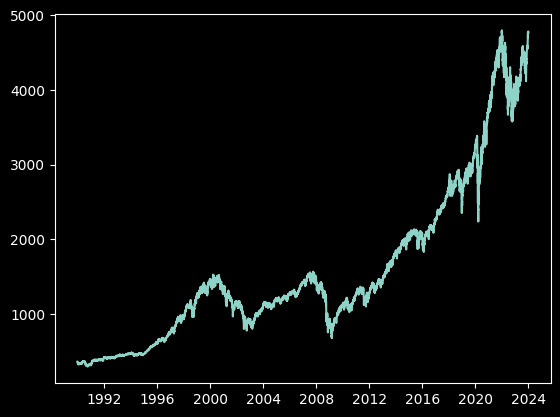

In [6]:
#plot chart
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

In [7]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

Price,Close,Open,Return,Bench_Bal
Ticker,^GSPC,^GSPC,,
Date,,,,
2023-12-22 00:00:00+00:00,4754.629883,4753.919922,1.001660,132186.878994
2023-12-26 00:00:00+00:00,4774.750000,4758.859863,1.004232,132746.252817
2023-12-27 00:00:00+00:00,4781.580078,4773.450195,1.001430,132936.140723
2023-12-28 00:00:00+00:00,4783.350098,4786.439941,1.000370,132985.350307
2023-12-29 00:00:00+00:00,4769.830078,4782.879883,0.997174,132609.470537


In [8]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

In [9]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Ticker,^GSPC,^GSPC,,,,,,
Date,,,,,,,,
2023-12-22 00:00:00+00:00,4754.629883,4753.919922,1.001660,132186.878994,133352.609915,-1165.730921,4468.218584,4335.861046
2023-12-26 00:00:00+00:00,4774.750000,4758.859863,1.004232,132746.252817,133352.609915,-606.357098,4477.157988,4340.426846
2023-12-27 00:00:00+00:00,4781.580078,4773.450195,1.001430,132936.140723,133352.609915,-416.469192,4485.316992,4345.055946
2023-12-28 00:00:00+00:00,4783.350098,4786.439941,1.000370,132985.350307,133352.609915,-367.259608,4493.519990,4349.376246
2023-12-29 00:00:00+00:00,4769.830078,4782.879883,0.997174,132609.470537,133352.609915,-743.139378,4502.624590,4353.765747


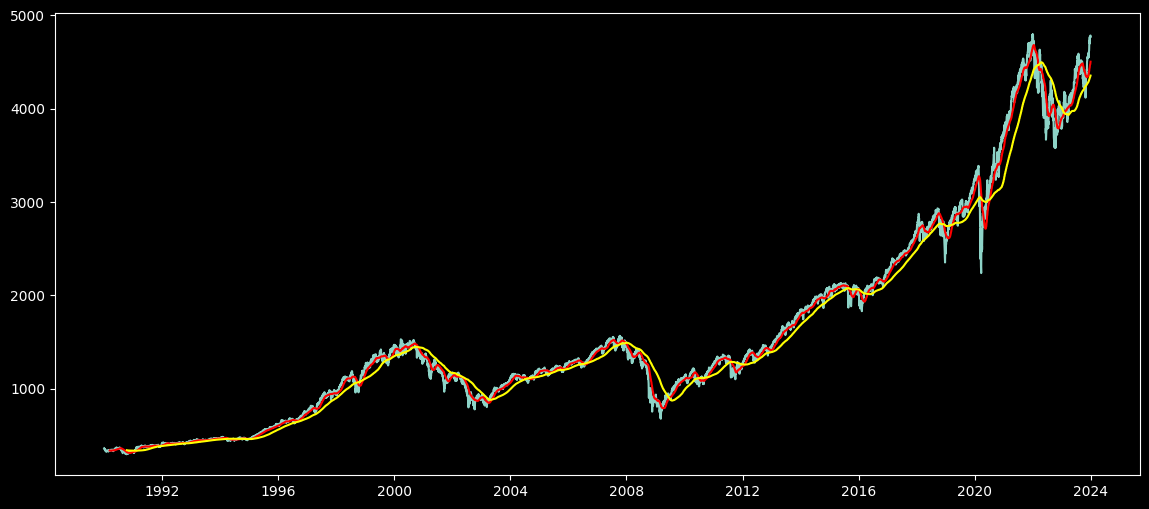

In [10]:
#draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close)
plt.plot(price.Fast_MA, color="red")
plt.plot(price.Slow_MA, color="yellow")

plt.show()

In [11]:
#define entries
price['Long'] = price.Fast_MA > price.Slow_MA

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Ticker,^GSPC,^GSPC,,,,,,,
Date,,,,,,,,,
2023-12-22 00:00:00+00:00,4754.629883,4753.919922,1.001660,132186.878994,133352.609915,-1165.730921,4468.218584,4335.861046,True
2023-12-26 00:00:00+00:00,4774.750000,4758.859863,1.004232,132746.252817,133352.609915,-606.357098,4477.157988,4340.426846,True
2023-12-27 00:00:00+00:00,4781.580078,4773.450195,1.001430,132936.140723,133352.609915,-416.469192,4485.316992,4345.055946,True
2023-12-28 00:00:00+00:00,4783.350098,4786.439941,1.000370,132985.350307,133352.609915,-367.259608,4493.519990,4349.376246,True
2023-12-29 00:00:00+00:00,4769.830078,4782.879883,0.997174,132609.470537,133352.609915,-743.139378,4502.624590,4353.765747,True


In [12]:
#calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret
Ticker,^GSPC,^GSPC,,,,,,,,
Date,,,,,,,,,,
2023-12-22 00:00:00+00:00,4754.629883,4753.919922,1.001660,132186.878994,133352.609915,-1165.730921,4468.218584,4335.861046,True,1.001660
2023-12-26 00:00:00+00:00,4774.750000,4758.859863,1.004232,132746.252817,133352.609915,-606.357098,4477.157988,4340.426846,True,1.004232
2023-12-27 00:00:00+00:00,4781.580078,4773.450195,1.001430,132936.140723,133352.609915,-416.469192,4485.316992,4345.055946,True,1.001430
2023-12-28 00:00:00+00:00,4783.350098,4786.439941,1.000370,132985.350307,133352.609915,-367.259608,4493.519990,4349.376246,True,1.000370
2023-12-29 00:00:00+00:00,4769.830078,4782.879883,0.997174,132609.470537,133352.609915,-743.139378,4502.624590,4353.765747,True,0.997174


In [13]:
#calculate system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal
Ticker,^GSPC,^GSPC,,,,,,,,,
Date,,,,,,,,,,,
2023-12-22 00:00:00+00:00,4754.629883,4753.919922,1.001660,132186.878994,133352.609915,-1165.730921,4468.218584,4335.861046,True,1.001660,125862.904586
2023-12-26 00:00:00+00:00,4774.750000,4758.859863,1.004232,132746.252817,133352.609915,-606.357098,4477.157988,4340.426846,True,1.004232,126395.517313
2023-12-27 00:00:00+00:00,4781.580078,4773.450195,1.001430,132936.140723,133352.609915,-416.469192,4485.316992,4345.055946,True,1.001430,126576.320760
2023-12-28 00:00:00+00:00,4783.350098,4786.439941,1.000370,132985.350307,133352.609915,-367.259608,4493.519990,4349.376246,True,1.000370,126623.176100
2023-12-29 00:00:00+00:00,4769.830078,4782.879883,0.997174,132609.470537,133352.609915,-743.139378,4502.624590,4353.765747,True,0.997174,126265.278857


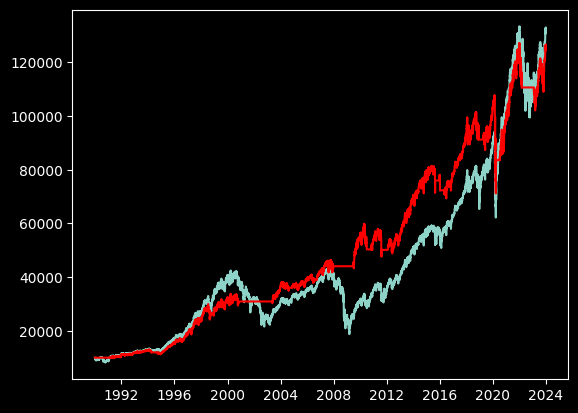

In [14]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")

plt.show()

In [15]:
#calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()

price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

print(sys_dd)

-33.92


In [16]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 1229.53%
Benchmark CAGR: 7.91
Benchmark DD: -56.78%

System Total return: 1162.65%
System CAGR: 7.74
System DD: -33.92%
System Time in the Market: 73.57%


In [17]:
def backtest(price, period_fast, period_slow):
    #calculate moving averages
    price['Fast_MA'] = price.Close.rolling(window = period_fast).mean().iloc[:,0]
    price['Slow_MA'] = price.Close.rolling(window = period_slow).mean().iloc[:,0]

    #Hold a position for every day the close is above the MA
    price['Long'] = price.Fast_MA > price.Slow_MA
    
    #on days when there is no trade, return is 1
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    
    #calculate balance
    price['Sys_Balance'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    cagr_system = (((price.Sys_Balance.iloc[-1]/price.Sys_Balance.iloc[0])**(1/YEARS))-1)*100
    
    return cagr_system

In [18]:
periods_slow = []
periods_fast = []
periods_slow.extend(range(5, 300, 5))
periods_fast.extend(range(5, 300, 5))

cagr = {}

results_full = []

for slow in periods_slow:
    results_fast = []
    for fast in periods_fast:
        result = backtest(price, fast, slow)
        results_fast.append(result)
    results_full.append(results_fast)

<Axes: >

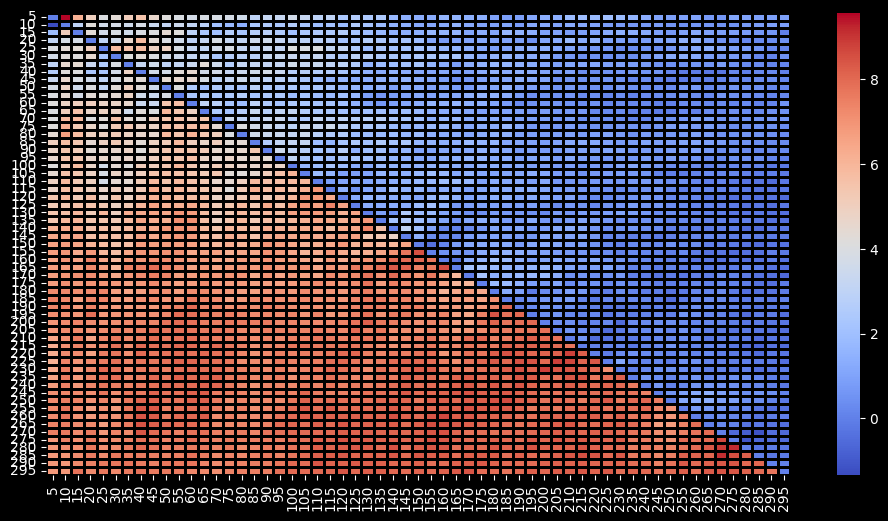

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_full,
            cmap="coolwarm",
            xticklabels=periods_fast,
            yticklabels=periods_slow,
            linewidth=1,
            linecolor="black"
           )

In [20]:
max_cagr = max(list(map(max, results_full)))

max_cagr

9.562346983350057

In [21]:
for i, x in enumerate(results_full):
    if max_cagr in x:
        s = results_full[i].index(max_cagr)
        f = i
print("Long Strategy")
print(f'Fast MA: {periods_fast[s]}')
print(f'Slow MA: {periods_slow[f]}')
print(f'CAGR: {round(results_full[f][s], 2)}%')

min_cagr = min(list(map(min, results_full)))

for i, x in enumerate(results_full):
    if min_cagr in x:
        s = x.index(min_cagr)
        f = i
print("\nShort strategy")
print(f'Fast MA: {periods_fast[s]}')
print(f'Slow MA: {periods_slow[f]}')
print(f'CAGR: {round(results_full[f][s], 2)}%')

Long Strategy
Fast MA: 10
Slow MA: 5
CAGR: 9.56%

Short strategy
Fast MA: 5
Slow MA: 10
CAGR: -1.33%


In [ ]:
# Define a function to calculate CAGR for a given year
def calculate_cagr_for_year(price, start_date, end_date, fast_ma, slow_ma):
    price_year = price.loc[start_date:end_date].copy()
    price_year['Fast_MA'] = price_year.Close.rolling(window=fast_ma).mean().iloc[:,0]
    price_year['Slow_MA'] = price_year.Close.rolling(window=slow_ma).mean().iloc[:,0]
    price_year['Long'] = price_year.Fast_MA > price_year.Slow_MA
    price_year['Sys_Ret'] = np.where(price_year.Long.shift(1) == True, price_year.Return, 1)
    price_year['Sys_Bal'] = STARTING_BALANCE * price_year.Sys_Ret.cumprod()
    cagr_year = (((price_year.Sys_Bal.iloc[-1] / price_year.Sys_Bal.iloc[0]) ** (1 / ((end_date - start_date).days / 365.25))) - 1) * 100
    return cagr_year

# Initialize lists to store results
best_cagr_params = []
worst_cagr_params = []

# Loop through each year and calculate the best and worst CAGR parameters
for year in range(START.year, END.year):
    start_date = pd.Timestamp(datetime.datetime(year, 1, 1)).tz_localize('UTC')
    end_date = pd.Timestamp(datetime.datetime(year + 1, 1, 1)).tz_localize('UTC')
    best_cagr = -np.inf
    worst_cagr = np.inf
    best_params = (0, 0)
    worst_params = (0, 0)
    
    for fast in periods_fast:
        for slow in periods_slow:
            if fast < slow:
                cagr = calculate_cagr_for_year(price, start_date, end_date, fast, slow)
                if cagr > best_cagr:
                    best_cagr = cagr
                    best_params = (fast, slow)
                if cagr < worst_cagr:
                    worst_cagr = cagr
                    worst_params = (fast, slow)
    
    best_cagr_params.append((year, best_params[0], best_params[1], best_cagr))
    print(f'Year: {year}, Best CAGR: {best_cagr}, Best Fast MA: {best_params[0]}, Best Slow MA: {best_params[1]}')
    worst_cagr_params.append((year, worst_params[0], worst_params[1], worst_cagr))
    print(f'Year: {year}, Worst CAGR: {worst_cagr}, Worst Fast MA: {worst_params[0]}, Worst Slow MA: {worst_params[1]}')
    
# Create a DataFrame to display the results
best_cagr_df = pd.DataFrame(best_cagr_params, columns=['Year', 'Best Fast MA', 'Best Slow MA', 'Best CAGR'])
worst_cagr_df = pd.DataFrame(worst_cagr_params, columns=['Year', 'Worst Fast MA', 'Worst Slow MA', 'Worst CAGR'])

# Display the results in a table
print("Best CAGR Parameters for Each Year:")
print(best_cagr_df)
print("\nWorst CAGR Parameters for Each Year:")
print(worst_cagr_df)


Best CAGR Parameters for Each Year:
    Year  Best Fast MA  Best Slow MA  Best CAGR
0   1990            30            35  10.180305
1   1991           115           120  17.847123
2   1992            55           105   8.297784
3   1993            50            80   7.765193
4   1994            65            70   5.529742
5   1995            10            20  28.111676
6   1996            30           145  18.619598
7   1997            10            15  35.451122
8   1998            25            30  31.554589
9   1999            55           200  17.165630
10  2000            60            65   4.981397
11  2001           125           135  12.328263
12  2002            55            65   5.910905
13  2003            15            60  28.748994
14  2004            65            75  14.323817
15  2005           110           120   7.461377
16  2006            20            30  12.163395
17  2007            60           145   9.226386
18  2008            65           135   5.099928
19  

Duplicates found: 3


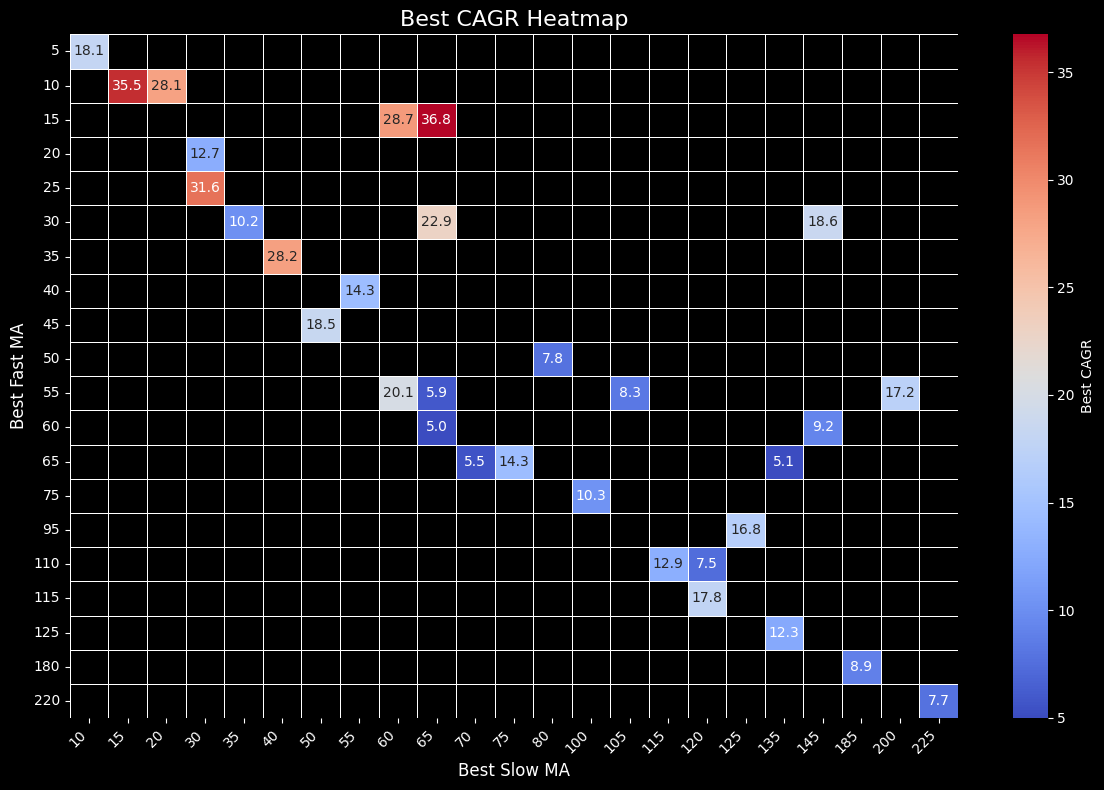

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for duplicates
duplicates = best_cagr_df.duplicated(subset=['Best Fast MA', 'Best Slow MA'])
print(f"Duplicates found: {duplicates.sum()}")

# Resolve duplicates by aggregating (e.g., using the mean of 'Best CAGR')
aggregated_df = best_cagr_df.groupby(['Best Fast MA', 'Best Slow MA'], as_index=False)['Best CAGR'].mean()

# Pivot the data
heatmap_data = aggregated_df.pivot(index='Best Fast MA', columns='Best Slow MA', values='Best CAGR')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=heatmap_data,  # Use the pivoted DataFrame
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,  # Annotate each cell with its value
    fmt=".1f",   # Format the annotations to 1 decimal place
    cbar_kws={'label': 'Best CAGR'}  # Add a label to the colorbar
)

plt.title("Best CAGR Heatmap", fontsize=16)
plt.xlabel("Best Slow MA", fontsize=12)
plt.ylabel("Best Fast MA", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

# Load Data into a Pandas DataFrame

**Symbol:** `^GSPC`

**Dates:**
- **START:** `datetime.datetime(2005, 1, 1)`
- **END:** `datetime.datetime(2020, 1, 1)`
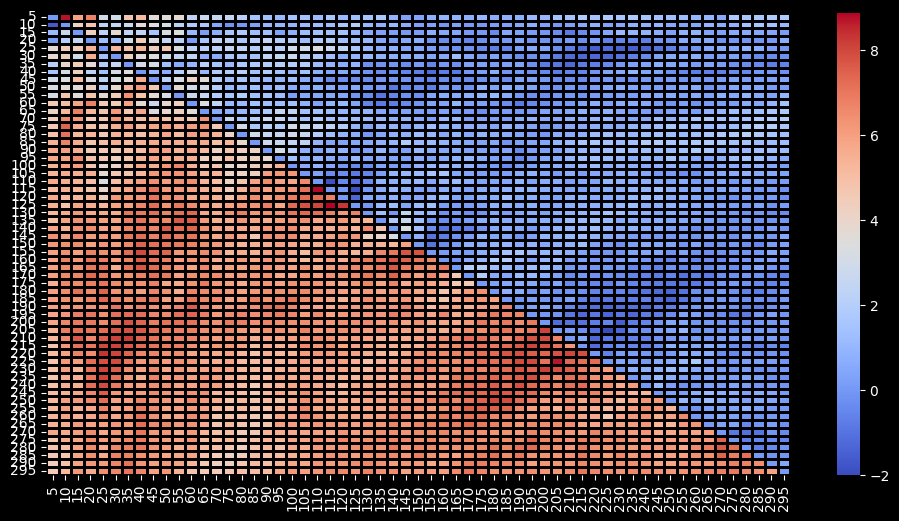
**Benchmark Metrics:**
- **Total Return:** 171.94%
- **CAGR:** 6.9%
- **Drawdown:** -56.78%

**Long Strategy:**
- **Fast MA:** 25
- **Slow MA:** 220
- **CAGR:** 8.33%

**Short Strategy:**
- **Fast MA:** 225
- **Slow MA:** 205
- **CAGR:** -2.0%

[*********************100%***********************]  1 of 1 completed


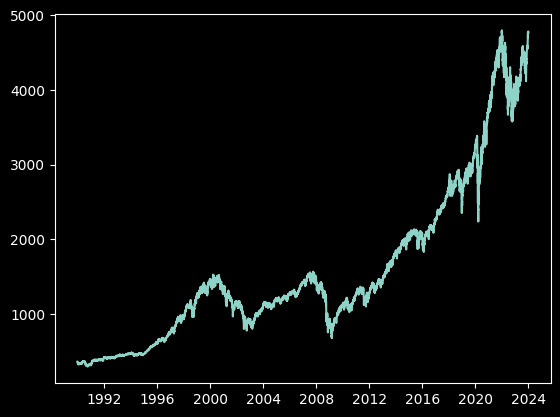

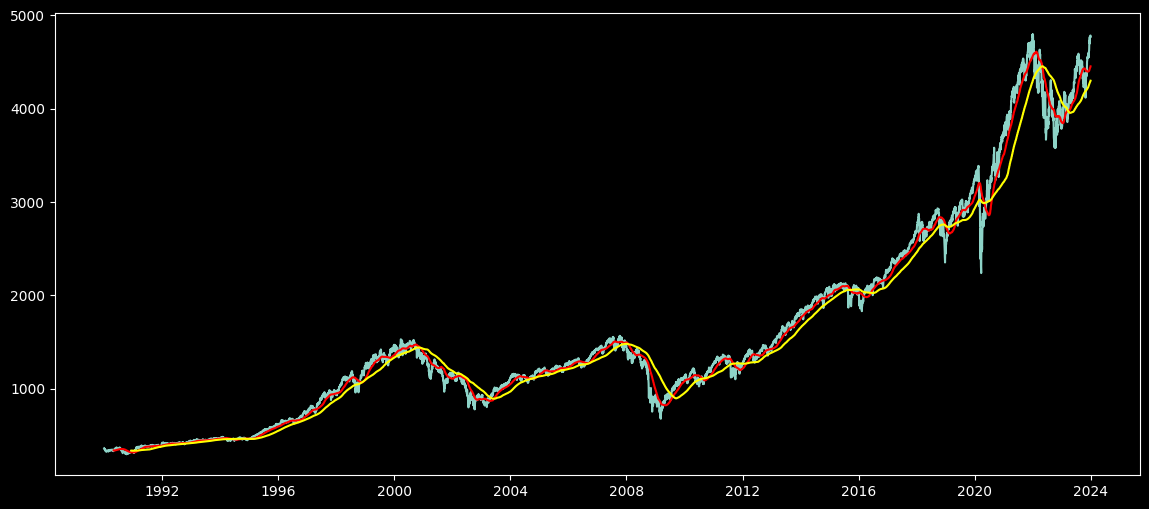

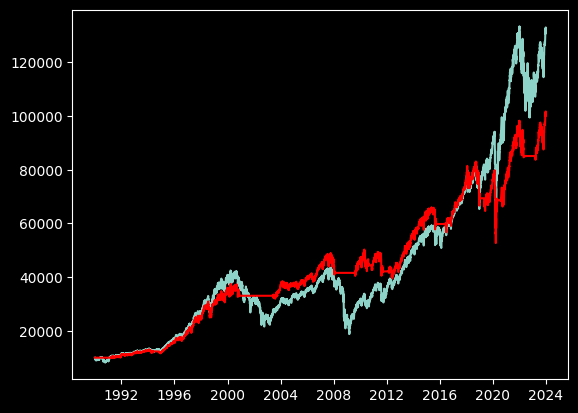

Benchmark Total return: 1229.53%
Benchmark CAGR: 7.91
Benchmark DD: -56.78%

System Total return: 914.14%
System CAGR: 7.05
System DD: -36.56%
System Time in the Market: 74.28%


In [23]:
# Define variables
FAST_MA = 85
SLOW_MA = 240


# Load data into a pandas dataframe
price = yf.download(symbol, start=START, end=END)

# Drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis=1)

# Plot chart
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

# Calculate daily return
price['Return'] = price.Close / price.Close.shift(1)
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

# Calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak
bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

# Calculate moving averages
price['Fast_MA'] = price.Close.rolling(window=FAST_MA).mean().iloc[:,0]
price['Slow_MA'] = price.Close.rolling(window=SLOW_MA).mean().iloc[:,0]

# Draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close)
plt.plot(price.Fast_MA, color="red")
plt.plot(price.Slow_MA, color="yellow")
plt.show()

# Define entries
price['Long'] = price.Fast_MA > price.Slow_MA

# Calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")
plt.show()

# Calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak
sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

# Calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[1]) ** (1 / YEARS)) - 1) * 100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) ** (1 / YEARS)) - 1) * 100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')


